In [1]:
# Import needed libraries
import os
import csv
import geopandas as gpd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
from pypalettes import load_cmap
import numpy as np
from shapely.geometry import Point
from matplotlib.patches import FancyArrowPatch
import scipy.io
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from statistics import median, quantiles
from matplotlib.lines import Line2D
import math

In [2]:
# Function to interpolate the colormap with cubic interpolation
def interpolate_cmap(cmap, num_interp_points):
    new_colors = cmap(np.linspace(0, 1, cmap.N))  # Ottieni i colori della colormap discreta
    new_cmap = LinearSegmentedColormap.from_list('my_interpolated_cmap', new_colors, N=num_interp_points)
    return new_cmap



In [3]:
# Cap values for each indicator (the ones used to normalize the values of each objective between 0 and 1 during the optimization)
maxtotalpro = 10.627501095537942e+06 #hp production
maxfirm = 3.207057309002500e+04 #firm hp
maxsed = 30 #sediment loads

In [4]:

# Reading optimization results for flushing
filename = 'optimization_objectives_flush_final_1.txt'
#filename1 = 'optimization_variables_flush_final_1.txt'
data = np.loadtxt(filename)
#data1 = np.loadtxt(filename1)
all_data = data
#all_data1 = data1
'''
# Check whether all the solutions are pareto optimal solutions
is_pareto_efficient = np.ones(all_data.shape[0], dtype=bool)

for i, current_point in enumerate(all_data):
    for j, other_point in enumerate(all_data):
        # If we have more solutions with the same values we keep just one solution
        if (
            all(other_point < current_point) and 
            not np.array_equal(other_point, current_point)
        ):
            is_pareto_efficient[i] = False
            break

'''
fnew = all_data
#fvariables = all_data1

fnew_unique, indices = np.unique(fnew, axis=0, return_index=True)


#fvariables_unique = fvariables[indices]




fnew_unique = all_data

# For the following plot, we locate sediment objective on the first column, hydro production on the second one, and firm hp on the third
a = fnew_unique[:, 0].copy()
b = fnew_unique[:, 1].copy()
fnew_unique[:, 0] = fnew_unique[:, 2]
fnew_unique[:, 1] = a
fnew_unique[:, 2] = b

fnew_unique_flush = fnew_unique
fnew_unique_flush[:, 0] = (1 - fnew_unique_flush[:, 0]) * maxsed;
fnew_unique_flush[:, 1] = (1 - fnew_unique_flush[:, 1]) * maxtotalpro*10**(-6) * 24 / 15
fnew_unique_flush[:, 2] = (1 - fnew_unique_flush[:, 2]) * maxfirm*24*10**(-3)

print(f"Pareto-efficient points:\n{fnew_unique}")



Pareto-efficient points:
[[ 16.04091     11.82643626 285.49095882]
 [ 15.79707     13.42222781 124.09233613]
 [ 15.51399     13.41892904 178.99228253]
 [ 15.46434     13.57310432  69.48718243]
 [ 15.45966     13.51393039  75.69322317]
 [ 15.54702     13.51284214 180.95269252]
 [ 15.99072     13.28136666 276.74954686]
 [ 15.49926     13.52569716  42.48401645]
 [ 15.50337     13.53168257 167.97103766]
 [ 15.85635     13.38284654  42.48401645]
 [ 15.52563     13.52219434  12.02877399]
 [ 15.53043     13.5186405   13.83447554]
 [ 15.52518     13.49718145  47.31538415]
 [ 15.56064     13.56745899  85.29284367]
 [ 15.53808     13.52636032 104.07875913]
 [ 15.53781     13.54972382 104.07568036]
 [ 15.51663     13.57233914 104.07721974]
 [ 15.95295     13.45837832 206.44417997]
 [ 15.57906     13.34536972 115.94666713]
 [ 15.52353     13.37732024 184.9974332 ]
 [ 15.5217      13.39694286 225.0115024 ]
 [ 15.99894     13.49662032 277.96258422]
 [ 15.73914     13.64878913 233.38423106]
 [ 15.749

In [5]:

# Reading optimization results for sluicing
filename = 'optimization_objectives_sluicing_final_1.txt'

data = np.loadtxt(filename)

all_data = data

'''
# Check whether all the solutions are pareto optimal solutions
is_pareto_efficient = np.ones(all_data.shape[0], dtype=bool)

for i, current_point in enumerate(all_data):
    for j, other_point in enumerate(all_data):
        # If we have more solutions with the same values we keep just one solution
        if (
            all(other_point < current_point) and 
            not np.array_equal(other_point, current_point)
        ):
            is_pareto_efficient[i] = False
            break


'''
fnew_unique = all_data
# For the following plot, we locate sediment objective on the first column, hydro production on the second one, and firm hp on the third
a = fnew_unique[:, 0].copy()
b = fnew_unique[:, 1].copy()
fnew_unique[:, 0] = fnew_unique[:, 2]
fnew_unique[:, 1] = a
fnew_unique[:, 2] = b

fnew_unique_sluicing = fnew_unique
fnew_unique_sluicing[:, 0] = (1 - fnew_unique_sluicing[:, 0]) * maxsed
fnew_unique_sluicing[:, 1] = (1 - fnew_unique_sluicing[:, 1]) * maxtotalpro*10**(-6) * 24 / 15
fnew_unique_sluicing[:, 2] = (1 - fnew_unique_sluicing[:, 2]) * maxfirm*24*10**(-3)
print(f"Pareto-efficient points:\n{fnew_unique}")


Pareto-efficient points:
[[  9.0132      14.7984637  126.3267571 ]
 [  9.02133     14.78984267 127.30734694]
 [  9.02616     14.78093257 122.59913024]
 [  8.48697     14.70052065 234.24474867]
 [ 10.50483     14.21332199 299.20382275]
 [  9.32919     14.59691526 199.89023765]
 [  9.77088     14.27866837 327.6024435 ]
 [ 10.46562     14.29638654 238.62045766]
 [ 10.35057     14.21301592 256.66823681]
 [ 10.38174     14.33819938 249.74638088]
 [ 10.1439      13.23491173 306.63906441]
 [ 10.02711     13.21829882 306.63906441]
 [ 10.33347     14.3106869  270.05628997]
 [  8.80194     14.83621258  99.99784285]
 [  8.79978     14.83063527 107.31993953]
 [  9.03921     14.78647588 103.33523496]
 [  9.97014     13.33015114 308.38088138]
 [  7.89333     14.67137579 325.09632064]
 [ 10.73184     14.25306034 308.22078508]
 [  9.94095     14.4135101  299.09991409]
 [  9.80727     14.41719997 324.96932117]
 [  7.89894     14.69115144 271.46482954]
 [  9.30474     14.32014113 316.82673094]
 [  9.132

In [6]:

# Reading optimization results for water rule curve
filename = 'optimization_objectives_waterrulecurve_1.txt'
data = np.loadtxt(filename)
all_data = data
'''
# Check whether all the solutions are pareto optimal solutions
is_pareto_efficient = np.ones(all_data.shape[0], dtype=bool)

for i, current_point in enumerate(all_data):
    for j, other_point in enumerate(all_data):
        # If we have more solutions with the same values we keep just one solution
        if (
            all(other_point < current_point) and 
            not np.array_equal(other_point, current_point)
        ):
            is_pareto_efficient[i] = False
            break


fnew = all_data[is_pareto_efficient]


fnew_unique = np.unique(fnew, axis=0)
'''
fnew_unique = all_data
# For the following plot, we locate sediment objective on the first column, hydro production on the second one, and firm hp on the third
a = fnew_unique[:, 0].copy()
b = fnew_unique[:, 1].copy()
fnew_unique[:, 0] = fnew_unique[:, 2]
fnew_unique[:, 1] = a
fnew_unique[:, 2] = b

pareto_matrix = fnew_unique
'''
pareto_matrix[:, 0] = (1 - pareto_matrix[:, 0]) * maxsed-0.6
pareto_matrix[:, 1] = (1 - pareto_matrix[:, 1]) * maxtotalpro*10**(-6) * 24 / 15+4.8
pareto_matrix[:, 2] = (1 - pareto_matrix[:, 2]) * maxfirm*24*10**(-3)
'''
pareto_matrix[:, 0] = (1 - pareto_matrix[:, 0]) * maxsed
pareto_matrix[:, 1] = (1 - pareto_matrix[:, 1]) * maxtotalpro*10**(-6) * 24 / 15
pareto_matrix[:, 2] = (1 - pareto_matrix[:, 2]) * maxfirm*24*10**(-3)
print(f"Pareto-efficient points:\n{pareto_matrix}")


Pareto-efficient points:
[[  7.89546     15.92848164 342.53527203]
 [  7.88127     16.22503143 339.96141611]
 [  7.88574     16.25478843 334.45733608]
 [  7.85463     16.6000887  354.72337262]
 [  7.88043     16.42423331 351.07194545]
 [  7.88433     16.16492228 335.93591778]
 [  7.89264     16.08369417 338.64523979]
 [  7.89042     16.12729243 367.45333762]
 [  7.88973     16.1335499  338.71143346]
 [  7.89363     15.92989297 343.03557297]
 [  7.90719     15.90714162 322.98966883]
 [  7.89564     16.2971624  322.19611457]
 [  7.8957      16.04407484 339.37875794]
 [  7.90743     15.6228007  325.25872602]
 [  7.90161     16.1101864  309.48385253]
 [  7.9011      16.36296789 308.71492847]
 [  7.90518     16.17750524 307.94215594]
 [  7.89705     15.89336837 331.95352229]
 [  7.89723     15.83159284 330.448771  ]
 [  7.89012     16.52132616 311.68363728]
 [  7.90452     16.04012991 316.94680317]
 [  7.90509     15.92538691 316.84058543]
 [  7.90089     16.21219341 325.91527479]
 [  7.905

In [7]:
# Historical values of the three objectives
# Obtained simulating VICRes-CASCADE from 2008 to 2022 with the original water rule curve
historicalpro = 13.31259859521568
historicalfirm = 167.6655259864105
historicalsedload = 7.73458307692526

/var/folders/m7/hdv2wgx56_393jmgypswfryr0000gn/T/ipykernel_13694/2074841741.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


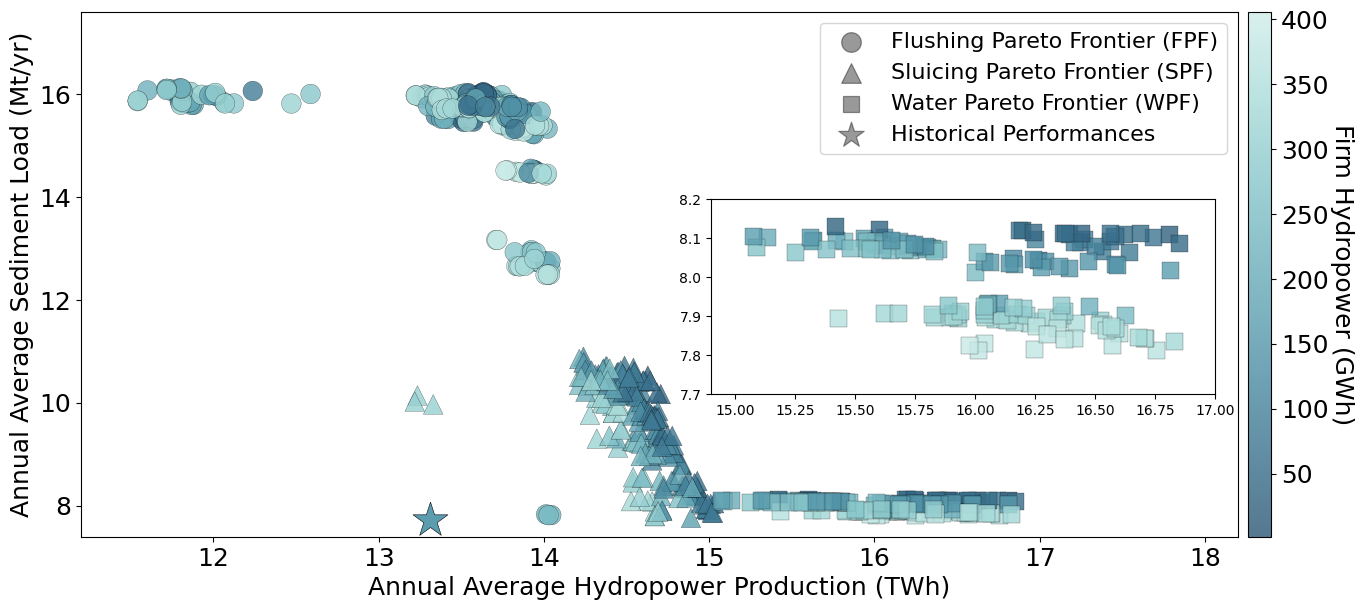

In [8]:

fig = plt.figure(figsize=(14, 15))


left = 0.03
bottom = 0.64
width = 0.85
height = 0.35


ax3 = fig.add_axes([left, bottom, width, height])
cmap=load_cmap("Teal")
cmap = interpolate_cmap(cmap, 1000)
cmap=cmap.reversed()
#ax3 = plt.subplot(212)
#ctx.add_basemap(ax, crs=reservoirs.crs.to_string(),zoom = 10,source=ctx.providers.CartoDB.Positron)
#ctx.add_basemap(ax, crs=reservoirs.crs.to_string(),zoom = 10,source=ctx.providers.NASAGIBS.ASTER_GDEM_Greyscale_Shaded_Relief)



#color_values_flush = fnew_unique_flush['fnew_unique_flush'][:, 2]
color_values_flush = fnew_unique_flush[:, 2]
color_values_sluicing = fnew_unique_sluicing[:, 2]
color_values_water = pareto_matrix[:, 2]

color_min = min(color_values_flush[color_values_flush >= 0].min(), color_values_sluicing.min(), color_values_water.min())
color_max = max(color_values_flush.max(), color_values_sluicing.max(), color_values_water.max())  


marker_size = 200
marker_alpha = 0.8
# Scatter plot for fnew_unique_flush
scatter_1 = ax3.scatter(0,
                           0,
                           s=marker_size, c='black', alpha=0.4,
                           marker='o',edgecolors='black',linewidth=0.9, label='Flushing Pareto Frontier (FPF)')

# Scatter plot for fnew_unique_sluicing
scatter_2 = ax3.scatter(0,
                              0,
                              s=marker_size, c='black', alpha=0.4,
                              marker='^',edgecolors='black',linewidth=0.9, label='Sluicing Pareto Frontier (SPF)')

# Scatter plot for pareto_matrix (Water Rule Curve)
scatter_3 = ax3.scatter(0,
                           0,
                           s=120, c='black', alpha=0.4,
                           marker='s',edgecolors='black',linewidth=0.9, label='Water Pareto Frontier (WPF)')

# Scatter plot for historicalpro e historicalsedload with pentagram marker
scatter_4 = ax3.scatter(0, 0,
                                s=370, c='black', alpha=0.4, marker='*',edgecolors='black',linewidth=0.9,
                                label='Historical Performances')
# Scatter plot for fnew_unique_flush
scatter_flush = ax3.scatter(fnew_unique_flush[:, 1], 
                            fnew_unique_flush[:, 0],
                           s=marker_size, c=color_values_flush, cmap=cmap, alpha=marker_alpha,
                           vmin=color_min, vmax=color_max, marker='o',edgecolors='black',linewidth=0.2)

# Scatter plot for fnew_unique_sluicing
scatter_sluicing = ax3.scatter(fnew_unique_sluicing[:, 1], 
                              fnew_unique_sluicing[:, 0],
                              s=marker_size, c=color_values_sluicing, cmap=cmap, alpha=marker_alpha,
                              vmin=color_min, vmax=color_max, marker='^',edgecolors='black',linewidth=0.2)

# Scatter plot for pareto_matrix (Water Rule Curve)
scatter_water = ax3.scatter(pareto_matrix[:, 1],
                           pareto_matrix[:, 0],
                           s=150, c=color_values_water, cmap=cmap, alpha=marker_alpha,
                           vmin=color_min, vmax=color_max, marker='s',edgecolors='black',linewidth=0.2)

# Scatter plot for historicalpro e historicalsedload
scatter_historical = ax3.scatter(historicalpro, historicalsedload,
                                s=700, c=historicalfirm,cmap=cmap, alpha=1.0, vmin=color_min, vmax=color_max, marker='*',edgecolors='black',linewidth=0.4)


divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="2%", pad=0.1)

cb = plt.colorbar(scatter_flush, cax=cax)

cb.set_label('Firm Hydropower (GWh)', fontsize=18, rotation=270, labelpad=18)
cb.ax.tick_params(labelsize=18)


ax3.set_xlabel('Annual Average Hydropower Production (TWh)', fontsize=18)
ax3.set_ylabel('Annual Average Sediment Load (Mt/yr)', fontsize=18)
#ax3.set_title('Water Flushing and Sluicing Pareto Frontier Comparison', fontsize=26)
ax3.set_xlim(7 * 10 ** 6 * 10 ** (-6) * 24 / 15, 18.2)
ax3.set_ylim(7.4, 17.6)
ax3.tick_params(axis='both', which='major', labelsize=18)
ax3.legend(fontsize=16)
#ax3.text(6.95 * 10 ** 6 * 10 ** (-6) * 24 / 15, 17.4, 'a', fontsize=22, ha='right',fontweight='bold')
#ax3.text(5.15 * 10 ** 6 * 10 ** (-6) * 24 / 15, 27.6, 'a', fontsize=22, ha='right',fontweight='bold')
# Defining x and y values for zooming
ylim_zoom = [7.7, 8.2]
xlim_zoom = [14.9, 17]

ax_zoom = fig.add_axes([0.48, 0.735, 0.36, 0.13])
ax_zoom.scatter(pareto_matrix[:, 1], pareto_matrix[:, 0],
                s=150, c=color_values_water, cmap=cmap, alpha=marker_alpha,vmin=color_min, vmax=color_max,edgecolors='black',linewidth=0.2,
                marker='s')
ax_zoom.set_xlim(xlim_zoom)
ax_zoom.set_ylim(ylim_zoom)
#ax_zoom.set_title('Zoom on Water Rule Curve Pareto Frontier', fontsize=16)
ax_zoom.tick_params(axis='both', which='minor', labelsize=12)

plt.tight_layout()
fig.savefig('Figure3.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)
# show
plt.show()

In [9]:
#Counting Percentage of solutions that dominate historical condition.
def is_pareto_dominant(point, others):
    
    for other in others:
        if not (point[0] >= other[0] and point[1] >= other[1] and point[2] >= other[2]):
            return False
        if (point[0] > other[0] or point[1] > other[1] or point[2] > other[2]):
            return True
    return False


In [10]:

historical_conditions = np.column_stack((historicalsedload, historicalpro, historicalfirm))

def count_pareto_dominant(points, historical_conditions):
    count = 0
    for point in points:
        if is_pareto_dominant(point, historical_conditions):
            count += 1
    return count

fnew_unique_flush_dominant = count_pareto_dominant(fnew_unique_flush, historical_conditions)
fnew_unique_sluicing_dominant = count_pareto_dominant(fnew_unique_sluicing, historical_conditions)
pareto_matrix_dominant = count_pareto_dominant(pareto_matrix, historical_conditions)

print(f"fnew_unique_flush dominant compared to historical conditions : {fnew_unique_flush_dominant} solutions")
print(f"fnew_unique_sluicing dominant compared to historical conditions: {fnew_unique_sluicing_dominant} solutions")
print(f"pareto_matrix dominant compared to historical conditions: {pareto_matrix_dominant} solutions")


fnew_unique_flush dominant compared to historical conditions : 196 solutions
fnew_unique_sluicing dominant compared to historical conditions: 94 solutions
pareto_matrix dominant compared to historical conditions: 95 solutions


In [11]:
fnew_unique_flush.shape


(308, 3)

In [12]:
fnew_unique_sluicing.shape


(226, 3)

In [13]:
pareto_matrix.shape

(140, 3)